# Visualization

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('data_droped_nov18_dummy_final.csv')

In [4]:
data = data.set_index('datetime')
data.index = pd.to_datetime(data.index)
data = data.drop(['Unnamed: 0.2','Unnamed: 0.1','Unnamed: 0', 'diff'],axis=1)
data=data.reindex(columns=['lots_available', 'total_lot',  'carpark_number','x_coord', 'y_coord',
'car_park_decks', 'gantry_height','BASEMENT CAR PARK', 'COVERED CAR PARK','MECHANISED AND SURFACE CAR PARK', 'MULTI-STOREY CAR PARK',
'SURFACE CAR PARK', '7AM-10.30PM', '7AM-7PM', 'NO', 'WHOLE DAY', 'NO.1','SUN & PH FR 1PM-10.30PM', 'SUN & PH FR 7AM-10.30PM', 'NO.2', 
'YES','N', 'Y'])

In [5]:
# create time features, day of week, hour of day
data["day_of_week"] = data.index.weekday
data["hour_of_day"] = data.index.hour

In [6]:
features = ['lots_available','day_of_week','hour_of_day','total_lot', 'carpark_number', 'x_coord', 'y_coord','car_park_decks', 'gantry_height', 'MULTI-STOREY CAR PARK','WHOLE DAY', 
       'NO.1','SUN & PH FR 7AM-10.30PM']

In [7]:
data = data[features]
data=data.reindex(columns=features)

In [11]:
data.loc['2016-02-19 11:15:00',:] = np.nan
data.dropna(inplace=True)

## EDA(exploratory data analysis)- geographical location of 855 HDB flat parking lot in Singapore

<AxesSubplot:xlabel='x_coord', ylabel='y_coord'>

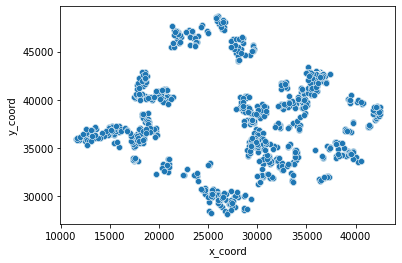

In [12]:
sns.scatterplot(x=data['x_coord'],y=data['y_coord'])

## 5 fold k-mean clustering analysis to identify 5 centroids

In [13]:
data_kmean = data[['x_coord','y_coord']]

In [15]:
km = KMeans(
    n_clusters=5)
y_km = km.fit_predict(data_kmean)

In [16]:
centroid= km.cluster_centers_

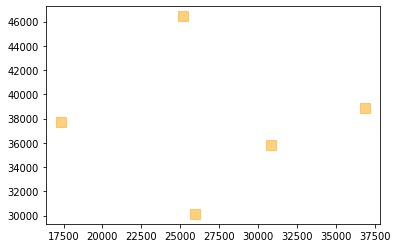

In [17]:
plt.scatter(centroid[:, 0], centroid[:, 1], 
            marker='s', color='orange', s = 100, 
            alpha=0.5, label='pred')

 - using identified centroids, study subsetted 5 regional datasets which consist of 10 to 12 parking lot per region

## comparison of performance between univariate and multivariate dataset

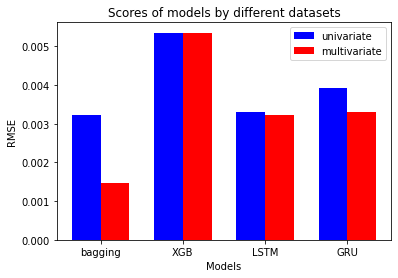

In [21]:
# grouped bar charts , RMSE scores

n_groups = 4

uni = (0.00322, 0.00535, 0.0033, 0.00392)
multi = (0.00147, 0.00535, 0.00323, 0.00331)

index = np.arange(n_groups)

bar_width = 0.35

rects1 = plt.bar(index, uni, bar_width,
                 color='b',
                 label='univariate')

rects2 = plt.bar(index + bar_width, multi, bar_width,
                 color='r',
                 label='multivariate')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Scores of models by different datasets')
plt.xticks(index + bar_width / 2, ('bagging', 'XGB', 'LSTM', 'GRU'))
plt.legend()

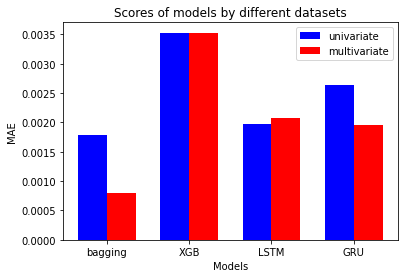

In [22]:
# grouped bar charts, MAE scores

n_groups = 4

uni = (0.00179, 0.00353, 0.00197, 0.00264)
multi = (0.0008, 0.00353, 0.00207, 0.00195)

index = np.arange(n_groups)

bar_width = 0.35

rects1 = plt.bar(index, uni, bar_width,
                 color='b',
                 label='univariate')

rects2 = plt.bar(index + bar_width, multi, bar_width,
                 color='r',
                 label='multivariate')

plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Scores of models by different datasets')
plt.xticks(index + bar_width / 2, ('bagging', 'XGB', 'LSTM', 'GRU'))
plt.legend()

## performance on different time window

### entire dataset

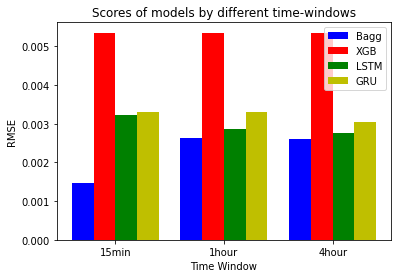

In [27]:
# RMSE scores

n_groups = 3

bagg = (0.00147, 0.00263, 0.0026)
xgb = (0.00535, 0.00535, 0.00533)
lstm = (0.00323,0.00285,0.00275)
gru = (0.00331,0.0033,0.00304)

index = np.arange(n_groups)

bar_width = 0.2

rects1 = plt.bar(index, bagg, bar_width,
                 color='b',
                 label='Bagg')

rects2 = plt.bar(index + bar_width, xgb, bar_width,
                 color='r',
                 label='XGB')

rects3 = plt.bar(index + bar_width + bar_width, lstm, bar_width,
                 color='g',
                 label='LSTM')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, gru, bar_width,
                 color='y',
                 label='GRU')                 

plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of models by different time-windows')
plt.xticks(index + bar_width + bar_width / 2, ('15min', '1hour', '4hour'))
plt.legend()

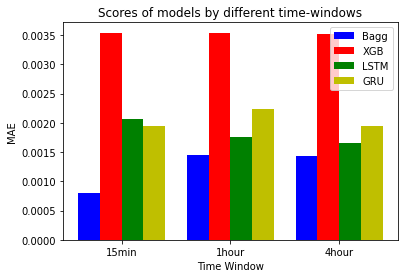

In [25]:
# MAE scores

n_groups = 3

bagg = (0.0008, 0.00145, 0.00143)
xgb = (0.00353, 0.00354, 0.00352)
lstm = (0.00207,0.00176,0.00166)
gru = (0.00195,0.00224,0.00194)

index = np.arange(n_groups)

bar_width = 0.2

rects1 = plt.bar(index, bagg, bar_width,
                 color='b',
                 label='Bagg')

rects2 = plt.bar(index + bar_width, xgb, bar_width,
                 color='r',
                 label='XGB')

rects3 = plt.bar(index + bar_width + bar_width, lstm, bar_width,
                 color='g',
                 label='LSTM')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, gru, bar_width,
                 color='y',
                 label='GRU')                 

plt.xlabel('Time Window')
plt.ylabel('MAE')
plt.title('Scores of models by different time-windows')
plt.xticks(index + bar_width + bar_width / 2, ('15min', '1hour', '4hour'))
plt.legend()

### group level

#### Bagging regressor

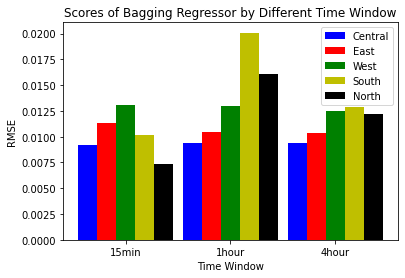

In [30]:
# RMSE scores

n_groups = 3

central = (0.00923, 0.00939, 0.0094)
east = (0.01137, 0.01043, 0.01033)
west = (0.01305,0.01297,0.01253)
south = (0.01019,0.02008,0.01285)
north = (0.00739,0.01603,0.01217)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='Central')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='East')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='West')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='South')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='North') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of Bagging Regressor by Different Time Window')
plt.xticks(index + bar_width + bar_width, ('15min', '1hour', '4hour'))
plt.legend()

#### XGBoost regressor

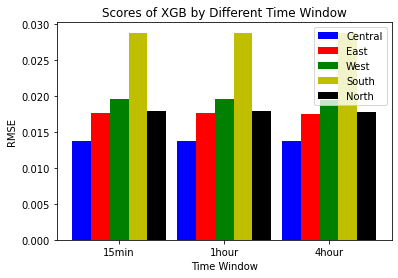

In [31]:
# RMSE scores

n_groups = 3

central = (0.01377, 0.01378, 0.01373)
east = (0.01765, 0.01768, 0.01751)
west = (0.01962,0.01965,0.01941)
south = (0.02883,0.02882,0.02881)
north = (0.01791,0.01794,0.01784)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='Central')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='East')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='West')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='South')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='North') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of XGB by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

#### LSTM

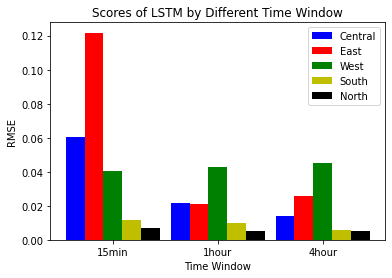

In [32]:
# RMSE scores

n_groups = 3

central = (0.06058, 0.02173, 0.01409)
east = (0.12172, 0.02095, 0.02571)
west = (0.04054,0.04283,0.04527)
south = (0.01184,0.00976,0.00555)
north = (0.00672,0.00523,0.00544)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='Central')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='East')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='West')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='South')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='North') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of LSTM by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

#### GRU

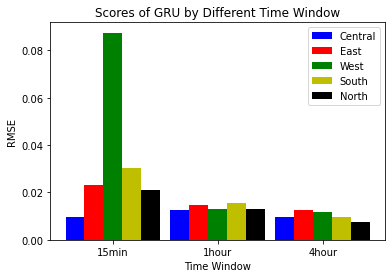

In [33]:
# RMSE scores

n_groups = 3

central = (0.00978, 0.01278, 0.0097)
east = (0.02318, 0.01484, 0.01268)
west = (0.08746,0.01315,0.0118)
south = (0.03042,0.01548,0.00956)
north = (0.02113,0.01288,0.00731)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='Central')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='East')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='West')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='South')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='North') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of GRU by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

### individual level

#### Bagging regressor

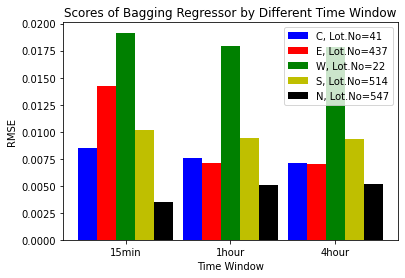

In [35]:
# RMSE scores

n_groups = 3

central = (0.00849, 0.00758, 0.00712)
east = (0.01424, 0.00715, 0.007)
west = (0.01916,0.01796,0.01781)
south = (0.01019,0.00946,0.00931)
north = (0.00353,0.00505,0.00518)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='C, Lot.No=41')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='E, Lot.No=437')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='W, Lot.No=22')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='S, Lot.No=514')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='N, Lot.No=547') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of Bagging Regressor by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

#### XGBoost regressor

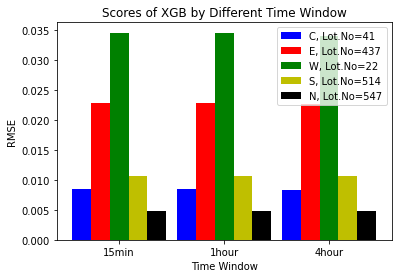

In [36]:
# RMSE scores

n_groups = 3

central = (0.00847, 0.00847, 0.00835)
east = (0.0228, 0.02285, 0.0227)
west = (0.03447,0.03453,0.03396)
south = (0.01066,0.01068,0.01057)
north = (0.00484,0.00484,0.00482)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='C, Lot.No=41')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='E, Lot.No=437')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='W, Lot.No=22')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='S, Lot.No=514')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='N, Lot.No=547') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of XGB by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

#### LSTM

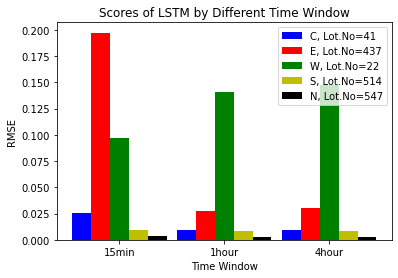

In [37]:
# RMSE scores

n_groups = 3

central = (0.02519, 0.00908, 0.00891)
east = (0.19719, 0.02782, 0.03021)
west = (0.09662,0.14102,0.14786)
south = (0.00952,0.00882,0.00873)
north = (0.00398,0.00283,0.00286)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='C, Lot.No=41')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='E, Lot.No=437')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='W, Lot.No=22')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='S, Lot.No=514')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='N, Lot.No=547') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of LSTM by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

#### GRU

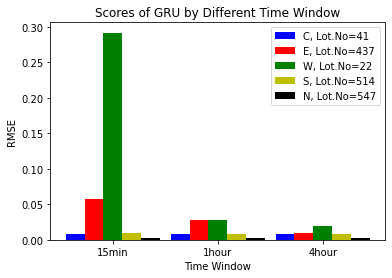

In [38]:
# RMSE scores

n_groups = 3

central = (0.00847, 0.00834, 0.0086)
east = (0.05689, 0.02749, 0.00987)
west = (0.29193,0.0275,0.01876)
south = (0.00981,0.00881,0.00883)
north = (0.00313,0.00288,0.003)

index = np.arange(n_groups)

bar_width = 0.18

rects1 = plt.bar(index, central, bar_width,
                 color='b',
                 label='C, Lot.No=41')

rects2 = plt.bar(index + bar_width, east, bar_width,
                 color='r',
                 label='E, Lot.No=437')

rects3 = plt.bar(index + bar_width + bar_width, west, bar_width,
                 color='g',
                 label='W, Lot.No=22')

rects4 = plt.bar(index + bar_width + bar_width + bar_width, south, bar_width,
                 color='y',
                 label='S, Lot.No=514')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width, north, bar_width,
                 color='k',
                 label='N, Lot.No=547') 
plt.xlabel('Time Window')
plt.ylabel('RMSE')
plt.title('Scores of GRU by Different Time Window')
plt.xticks(index + bar_width +bar_width, ('15min', '1hour', '4hour'))
plt.legend()

## performance of models in different time horizon

### entire dataset

In [42]:
bagging_855 = pd.read_csv('visualization/rmse40step855_bagging.csv')
xgb_855 = pd.read_csv('visualization/rmse40step855_xgb.csv')
lstm_855 = pd.read_csv('visualization/rmse40step855_lstm.csv')
gru_855 = pd.read_csv('visualization/rmse40step855gru.csv')
lstm_seq_855 = pd.read_csv('visualization/rmse40step855_lstm_seq2seq.csv')
gru_seq_855 = pd.read_csv('visualization/rmse40step855_gru_seq2seq.csv')

In [43]:
bagging_855 =bagging_855.iloc[:,1]
xgb_855 =xgb_855.iloc[:,1]
lstm_855 = lstm_855.iloc[:,1]
gru_855 = gru_855.iloc[:,1]
lstm_seq_855 = lstm_seq_855.iloc[:,1]
gru_seq_855 = gru_seq_855.iloc[:,1]

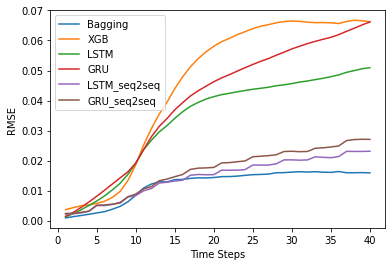

In [47]:
x = np.arange(1,41)  # 40 time horizon which is equivalent to the 10-hour

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_855.values, label='Bagging')  
ax.plot(x, xgb_855.values, label='XGB')  
ax.plot(x, lstm_855.values, label='LSTM') 
ax.plot(x, gru_855.values, label='GRU') 
ax.plot(x, lstm_seq_855.values, label='LSTM_seq2seq') 
ax.plot(x, gru_seq_855.values, label='GRU_seq2seq')  

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

### group level

#### central area

In [48]:
bagging_central = pd.read_csv('visualization/rmse40step_central_bagging.csv')
xgb_central = pd.read_csv('visualization/rmse40step_central_xgb.csv')
lstm_central = pd.read_csv('visualization/rmse40step_central_lstm.csv')
gru_central = pd.read_csv('visualization/rmse40step_central_gru.csv')
lstm_central_seq = pd.read_csv('visualization/rmse40step_central_lstm_seq2seq.csv')
gru_central_seq = pd.read_csv('visualization/rmse40step_central_gru_seq2seq.csv')

In [49]:
bagging_central =bagging_central.iloc[:,1]
xgb_central =xgb_central.iloc[:,1]
lstm_central = lstm_central.iloc[:,1]
gru_central = gru_central.iloc[:,1]
lstm_central_seq = lstm_central_seq.iloc[:,1]
gru_central_seq = gru_central_seq.iloc[:,1]

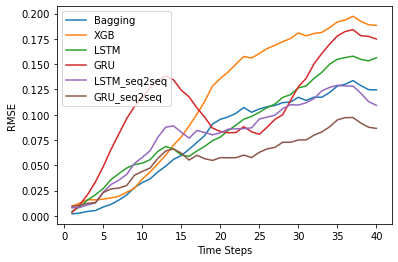

In [51]:
x = np.arange(1,41)  # 40 time horizon which is equivalent to the 10-hour

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_central.values, label='Bagging')  
ax.plot(x, xgb_central.values, label='XGB')
ax.plot(x, lstm_central.values, label='LSTM')
ax.plot(x, gru_central.values, label='GRU')
ax.plot(x, lstm_central_seq.values, label='LSTM_seq2seq')
ax.plot(x, gru_central_seq.values, label='GRU_seq2seq')

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### north area

In [52]:
bagging_north = pd.read_csv('visualization/rmse40step_north_bagging.csv')
xgb_north = pd.read_csv('visualization/rmse40step_north_xgb.csv')
lstm_north = pd.read_csv('visualization/rmse40step_north_lstm.csv')
gru_north = pd.read_csv('visualization/rmse40step_north_gru.csv')
lstm_north_seq = pd.read_csv('visualization/rmse40step_north_lstm_seq2seq.csv')
gru_north_seq = pd.read_csv('visualization/rmse40step_north_gru_seq2seq.csv')

In [53]:
bagging_north =bagging_north.iloc[:,1]
xgb_north =xgb_north.iloc[:,1]
lstm_north = lstm_north.iloc[:,1]
gru_north = gru_north.iloc[:,1]
lstm_north_seq = lstm_north_seq.iloc[:,1]
gru_north_seq = gru_north_seq.iloc[:,1]

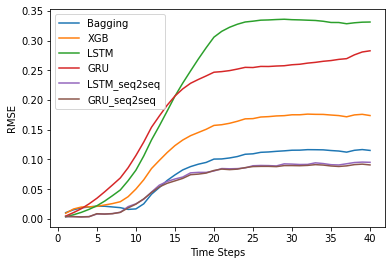

In [54]:
x = np.arange(1,41) # 40 time horizon which is equivalent to the 10-hour

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_north.values, label='Bagging')
ax.plot(x, xgb_north.values, label='XGB')
ax.plot(x, lstm_north.values, label='LSTM')
ax.plot(x, gru_north.values, label='GRU')
ax.plot(x, lstm_north_seq.values, label='LSTM_seq2seq')
ax.plot(x, gru_north_seq.values, label='GRU_seq2seq')

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### west area

In [55]:
bagging_west = pd.read_csv('visualization/rmse40step_west_bagging.csv')
xgb_west = pd.read_csv('visualization/rmse40step_west_xgb.csv')
lstm_west = pd.read_csv('visualization/rmse40step_west_lstm.csv')
gru_west = pd.read_csv('visualization/rmse40step_west_gru.csv')
lstm_west_seq = pd.read_csv('visualization/rmse40step_west_lstm_seq2seq.csv')
gru_west_seq = pd.read_csv('visualization/rmse40step_west_gru_seq2seq.csv')

In [56]:
bagging_west =bagging_west.iloc[:,1]
xgb_west =xgb_west.iloc[:,1]
lstm_west = lstm_west.iloc[:,1]
gru_west = gru_west.iloc[:,1]
lstm_west_seq = lstm_west_seq.iloc[:,1]
gru_west_seq = gru_west_seq.iloc[:,1]

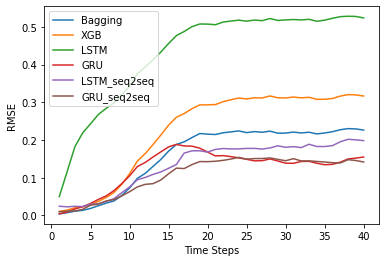

In [57]:
x = np.arange(1,41)

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_west.values, label='Bagging')
ax.plot(x, xgb_west.values, label='XGB')
ax.plot(x, lstm_west.values, label='LSTM')
ax.plot(x, gru_west.values, label='GRU')
ax.plot(x, lstm_west_seq.values, label='LSTM_seq2seq')
ax.plot(x, gru_west_seq.values, label='GRU_seq2seq') 

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### east area

In [58]:
bagging_east = pd.read_csv('visualization/rmse40step_east_bagging.csv')
xgb_east = pd.read_csv('visualization/rmse40step_east_xgb.csv')
lstm_east = pd.read_csv('visualization/rmse40step_east_lstm.csv')
gru_east = pd.read_csv('visualization/rmse40step_east_gru.csv')
lstm_east_seq = pd.read_csv('visualization/rmse40step_east_lstm_seq2seq.csv')
gru_east_seq = pd.read_csv('visualization/rmse40step_east_gru_seq2seq.csv')

In [59]:
bagging_east =bagging_east.iloc[:,1]
xgb_east =xgb_east.iloc[:,1]
lstm_east = lstm_east.iloc[:,1]
gru_east = gru_east.iloc[:,1]
lstm_east_seq = lstm_east_seq.iloc[:,1]
gru_east_seq = gru_east_seq.iloc[:,1]

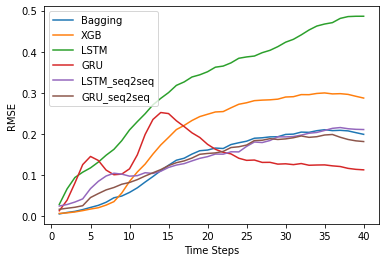

In [60]:
x = np.arange(1,41) 

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_east.values, label='Bagging')
ax.plot(x, xgb_east.values, label='XGB')
ax.plot(x, lstm_east.values, label='LSTM')
ax.plot(x, gru_east.values, label='GRU')
ax.plot(x, lstm_east_seq.values, label='LSTM_seq2seq')
ax.plot(x, gru_east_seq.values, label='GRU_seq2seq')

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### south area

In [61]:
bagging_south = pd.read_csv('visualization/rmse40step_south_bagging.csv')
xgb_south = pd.read_csv('visualization/rmse40step_south_xgb.csv')
lstm_south = pd.read_csv('visualization/rmse40step_south_lstm.csv')
gru_south = pd.read_csv('visualization/rmse40step_south_gru.csv')
lstm_south_seq = pd.read_csv('visualization/rmse40step_south_lstm_seq2seq.csv')
gru_south_seq = pd.read_csv('visualization/rmse40step_south_gru_seq2seq.csv')

In [62]:
bagging_south =bagging_south.iloc[:,1]
xgb_south =xgb_south.iloc[:,1]
lstm_south = lstm_south.iloc[:,1]
gru_south = gru_south.iloc[:,1]
lstm_south_seq = lstm_south_seq.iloc[:,1]
gru_south_seq = gru_south_seq.iloc[:,1]

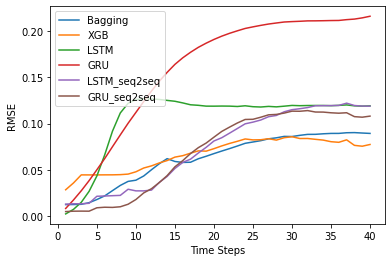

In [63]:
x = np.arange(1,41)

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_south.values, label='Bagging') 
ax.plot(x, xgb_south.values, label='XGB')  
ax.plot(x, lstm_south.values, label='LSTM')  
ax.plot(x, gru_south.values, label='GRU') 
ax.plot(x, lstm_south_seq.values, label='LSTM_seq2seq') 
ax.plot(x, gru_south_seq.values, label='GRU_seq2seq')  

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

### individual level

#### central area

In [64]:
bagging_single_central = pd.read_csv('visualization/rmse40step_single_central_bagging.csv')
xgb_single_central = pd.read_csv('visualization/rmse40step_single_central_xgb.csv')
lstm_single_central = pd.read_csv('visualization/rmse40step_single_central_lstm.csv')
gru_single_central = pd.read_csv('visualization/rmse40step_single_central_gru.csv')
lstm_single_central_seq = pd.read_csv('visualization/rmse40step_single_central_lstm_seq2seq.csv')
gru_single_central_seq = pd.read_csv('visualization/rmse40step_single_central_gru_seq2seq.csv')

In [65]:
bagging_single_central =bagging_single_central.iloc[:,1]
xgb_single_central =xgb_single_central.iloc[:,1]
lstm_single_central = lstm_single_central.iloc[:,1]
gru_single_central = gru_single_central.iloc[:,1]
lstm_single_central_seq = lstm_single_central_seq.iloc[:,1]
gru_single_central_seq = gru_single_central_seq.iloc[:,1]

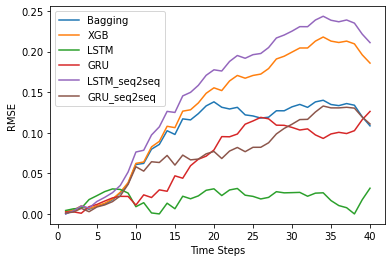

In [66]:
x = np.arange(1,41)

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_single_central.values, label='Bagging')  
ax.plot(x, xgb_single_central.values, label='XGB')  
ax.plot(x, lstm_single_central.values, label='LSTM')  
ax.plot(x, gru_single_central.values, label='GRU') 
ax.plot(x, lstm_single_central_seq.values, label='LSTM_seq2seq') 
ax.plot(x, gru_single_central_seq.values, label='GRU_seq2seq') 

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### north area

In [67]:
bagging_single_north = pd.read_csv('visualization/rmse40step_single_north_bagging.csv')
xgb_single_north = pd.read_csv('visualization/rmse40step_single_north_xgb.csv')
lstm_single_north = pd.read_csv('visualization/rmse40step_single_north_lstm.csv')
gru_single_north = pd.read_csv('visualization/rmse40step_single_north_gru.csv')
lstm_single_north_seq = pd.read_csv('visualization/rmse40step_single_north_lstm_seq2seq.csv')
gru_single_north_seq = pd.read_csv('visualization/rmse40step_single_north_gru_seq2seq.csv')

In [68]:
bagging_single_north =bagging_single_north.iloc[:,1]
xgb_single_north =xgb_single_north.iloc[:,1]
lstm_single_north = lstm_single_north.iloc[:,1]
gru_single_north = gru_single_north.iloc[:,1]
lstm_single_north_seq = lstm_single_north_seq.iloc[:,1]
gru_single_north_seq = gru_single_north_seq.iloc[:,1]

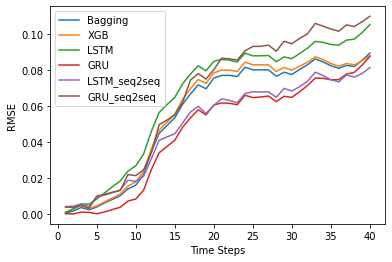

In [69]:
x = np.arange(1,41)

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_single_north.values, label='Bagging')  
ax.plot(x, xgb_single_north.values, label='XGB') 
ax.plot(x, lstm_single_north.values, label='LSTM') 
ax.plot(x, gru_single_north.values, label='GRU')  
ax.plot(x, lstm_single_north_seq.values, label='LSTM_seq2seq') 
ax.plot(x, gru_single_north_seq.values, label='GRU_seq2seq') 

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### west area

In [70]:
bagging_single_west = pd.read_csv('visualization/rmse40step_single_west_bagging.csv')
xgb_single_west = pd.read_csv('visualization/rmse40step_single_west_xgb.csv')
lstm_single_west = pd.read_csv('visualization/rmse40step_single_west_lstm.csv')
gru_single_west = pd.read_csv('visualization/rmse40step_single_west_gru.csv')
lstm_single_west_seq = pd.read_csv('visualization/rmse40step_single_west_lstm_seq2seq.csv')
gru_single_west_seq = pd.read_csv('visualization/rmse40step_single_west_gru_seq2seq.csv')

In [71]:
bagging_single_west =bagging_single_west.iloc[:,1]
xgb_single_west =xgb_single_west.iloc[:,1]
lstm_single_west = lstm_single_west.iloc[:,1]
gru_single_west = gru_single_west.iloc[:,1]
lstm_single_west_seq = lstm_single_west_seq.iloc[:,1]
gru_single_west_seq = gru_single_west_seq.iloc[:,1]

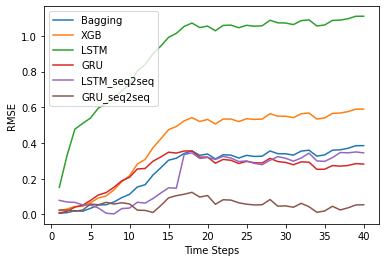

In [72]:
x = np.arange(1,41)

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_single_west.values, label='Bagging')  
ax.plot(x, xgb_single_west.values, label='XGB')  
ax.plot(x, lstm_single_west.values, label='LSTM')  
ax.plot(x, gru_single_west.values, label='GRU') 
ax.plot(x, lstm_single_west_seq.values, label='LSTM_seq2seq') 
ax.plot(x, gru_single_west_seq.values, label='GRU_seq2seq')

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### east area

In [73]:
bagging_single_east = pd.read_csv('visualization/rmse40step_single_east_bagging.csv')
xgb_single_east = pd.read_csv('visualization/rmse40step_single_east_xgb.csv')
lstm_single_east = pd.read_csv('visualization/rmse40step_single_east_lstm.csv')
gru_single_east = pd.read_csv('visualization/rmse40step_single_east_gru.csv')
lstm_single_east_seq = pd.read_csv('visualization/rmse40step_single_east_lstm_seq2seq.csv')
gru_single_east_seq = pd.read_csv('visualization/rmse40step_single_east_gru_seq2seq.csv')

In [74]:
bagging_single_east =bagging_single_east.iloc[:,1]
xgb_single_east =xgb_single_east.iloc[:,1]
lstm_single_east = lstm_single_east.iloc[:,1]
gru_single_east = gru_single_east.iloc[:,1]
lstm_single_east_seq = lstm_single_east_seq.iloc[:,1]
gru_single_east_seq = gru_single_east_seq.iloc[:,1]

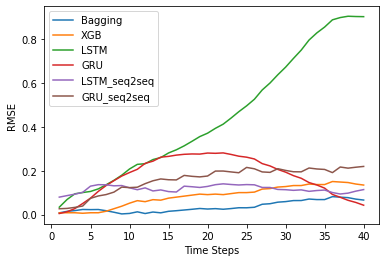

In [75]:
x = np.arange(1,41)

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_single_east.values, label='Bagging')  
ax.plot(x, xgb_single_east.values, label='XGB')  
ax.plot(x, lstm_single_east.values, label='LSTM') 
ax.plot(x, gru_single_east.values, label='GRU')
ax.plot(x, lstm_single_east_seq.values, label='LSTM_seq2seq')
ax.plot(x, gru_single_east_seq.values, label='GRU_seq2seq')

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.

#### south area

In [76]:
bagging_single_south = pd.read_csv('visualization/rmse40step_single_south_bagging.csv')
xgb_single_south = pd.read_csv('visualization/rmse40step_single_south_xgb.csv')
lstm_single_south = pd.read_csv('visualization/rmse40step_single_south_lstm.csv')
gru_single_south = pd.read_csv('visualization/rmse40step_single_south_gru.csv')
lstm_single_south_seq = pd.read_csv('visualization/rmse40step_single_south_lstm_seq2seq.csv')
gru_single_south_seq = pd.read_csv('visualization/rmse40step_single_south_gru_seq2seq.csv')

In [77]:
bagging_single_south =bagging_single_south.iloc[:,1]
xgb_single_south =xgb_single_south.iloc[:,1]
lstm_single_south = lstm_single_south.iloc[:,1]
gru_single_south = gru_single_south.iloc[:,1]
lstm_single_south_seq = lstm_single_south_seq.iloc[:,1]
gru_single_south_seq = gru_single_south_seq.iloc[:,1]

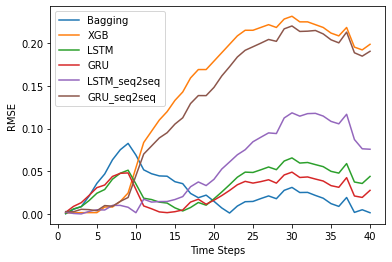

In [78]:
x = np.arange(1,41) 

fig, ax = plt.subplots()  # Create a figure and axes 
# a figure can hold multiple subplots (axes)
# one subplot is called an Axes Object (I guess an x-axis and a y-axis), 
# multiple subplots are called a set of Axes Objects
ax.plot(x, bagging_single_south.values, label='Bagging') 
ax.plot(x, xgb_single_south.values, label='XGB')  
ax.plot(x, lstm_single_south.values, label='LSTM') 
ax.plot(x, gru_single_south.values, label='GRU')  
ax.plot(x, lstm_single_south_seq.values, label='LSTM_seq2seq') 
ax.plot(x, gru_single_south_seq.values, label='GRU_seq2seq')

ax.set_xlabel('Time Steps')  # Add an x-label to the axes.
ax.set_ylabel('RMSE')  # Add a y-label to the axes.
#ax.set_title("performance of models 855 parking lots")  # Add a title to the axes.
ax.legend()  # Add a legend.